# Balloon size and percentage blockage detection in balloon angioplasty

In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import morphology, io, color, util

### Using Distance Transform

In [26]:
def detectBalloonSize(angiogramPath, threshold):
    angiogramImage = io.imread(angiogramPath)
    plt.imshow(angiogramImage)
    plt.title("Target Image")
    plt.show()
    _, invertedBinary = cv2.threshold(angiogramImage, threshold, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(invertedBinary)
    plt.title("Binary Image")
    plt.show()
    invertedBinary = invertedBinary[:,:,0]
    invertedBinary = invertedBinary.T
    
    out, distanceTransform = morphology.medial_axis(invertedBinary, return_distance=True)
    out_distance = out*distanceTransform

    f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10,4))
    ax0.imshow(invertedBinary, cmap='gray', interpolation='nearest')
    ax0.set_title("Transformed Binary Image")
    ax1.imshow(distanceTransform, cmap='gray', interpolation='nearest')
    ax1.set_title("Distance Map")
    ax2.contour(invertedBinary, [0.5], colors='w')
    ax2.imshow(out_distance, cmap='magma')
    ax2.set_title("Medial Axis")
    plt.show()
    
    print("Target artery diameter = ", max(map(max, distanceTransform))*2, "mm")
    print("Blockage percentage = ", 100-(min(map(max, distanceTransform)) / max(map(max, distanceTransform)))*100, "%")

In [27]:
def comparision():
    f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10,4))
    case1 = cv2.imread(r"XRayImages\angiogram.jpg")
    ax0.imshow(case1)
    ax0.set_title("Diameter=19.69  Block=28.92%", fontsize=10)
    case2 = cv2.imread(r"XRayImages\stenosis.png")
    ax1.imshow(case2)
    ax1.set_title("Diameter=18.11  Block=65.07%", fontsize=10)
    case3 = cv2.imread(r"XRayImages\stenosis.jpg")
    ax2.imshow(case3)
    ax2.set_title("Diameter=26.30  Block=72.58%", fontsize=10)
    plt.show()

In [28]:
def case3():
    image = cv2.imread(r"XRayImages\stenosis_crop.png")
    plt.imshow(image)
    plt.title("Target Image")
    plt.show()
    ret, thresh = cv2.threshold(image, 68, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(thresh)
    plt.title("Binary Image")
    plt.show()
    binary = thresh[:,:,0]
    binary.shape
    binary = binary.T
    out, distance = morphology.medial_axis(binary, return_distance=True)
    out_dist = out*distance

    f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10,4))
    ax0.imshow(binary, cmap='gray', interpolation='nearest')
    ax0.set_title("Transformed Binary")
    ax1.imshow(distance, cmap='gray', interpolation='nearest')
    ax1.set_title("Distance Map")
    ax2.contour(binary, [0.5], colors='w')
    ax2.imshow(out_dist, cmap='magma')
    ax2.set_title("Medial Axis")
    plt.show()

    print("Target artery diameter = ", max(map(max, distance))*2, "mm")
    print("Blockage percentage = ", 100-(min(map(max, distance)) / max(map(max, distance)))*100, "%")

## Case 1

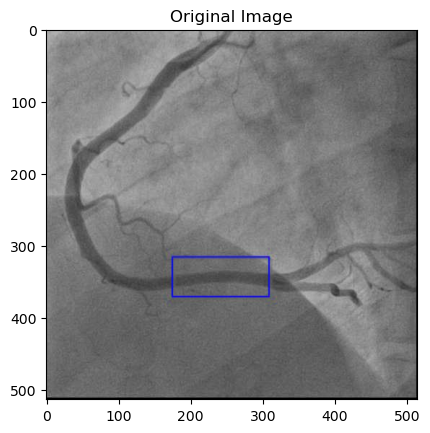

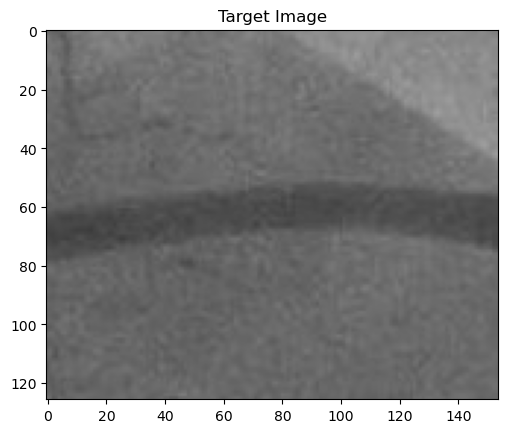

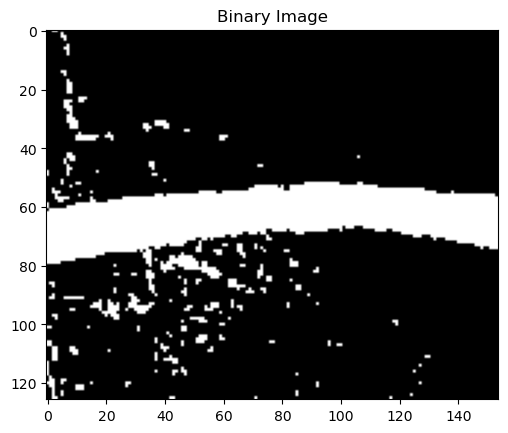

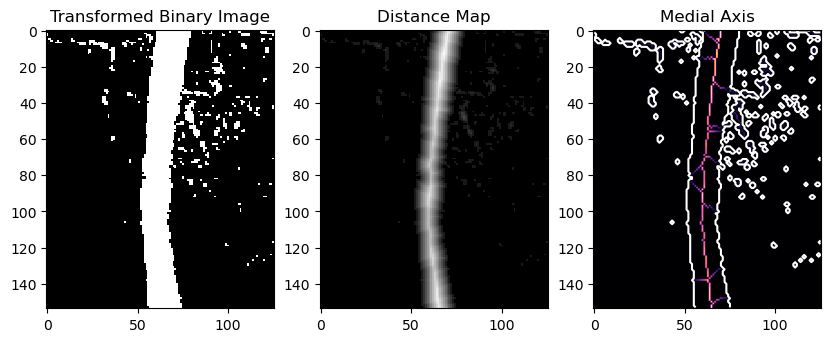

Target artery diameter =  19.697715603592208 mm
Blockage percentage =  28.925768440646664 %


In [30]:
originalImage = cv2.imread(r"XRayImages\angiogram.jpg")
plt.imshow(originalImage)
plt.title("Original Image")
plt.show()
detectBalloonSize(r"XRayImages\angiogram_crop.jpg", 95)

## Case 2

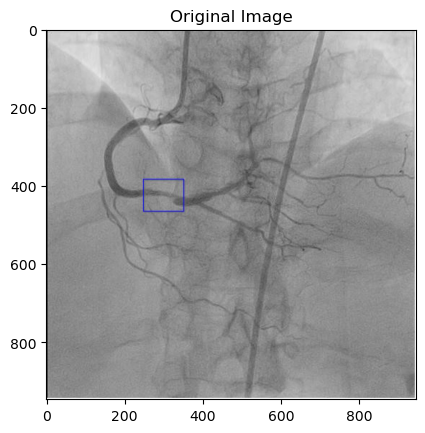

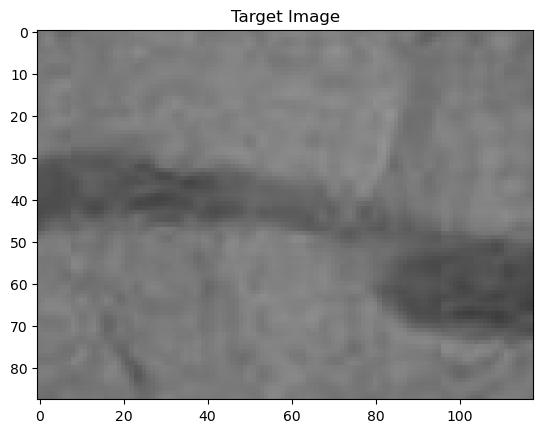

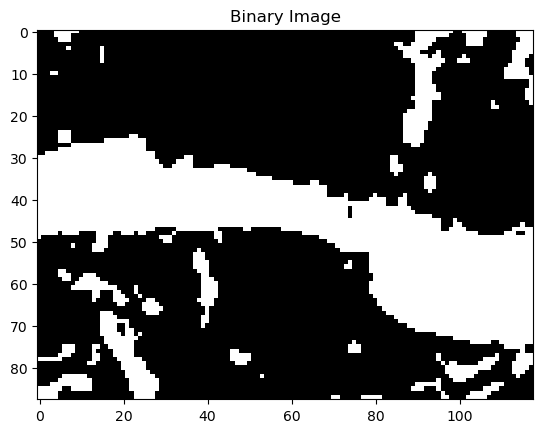

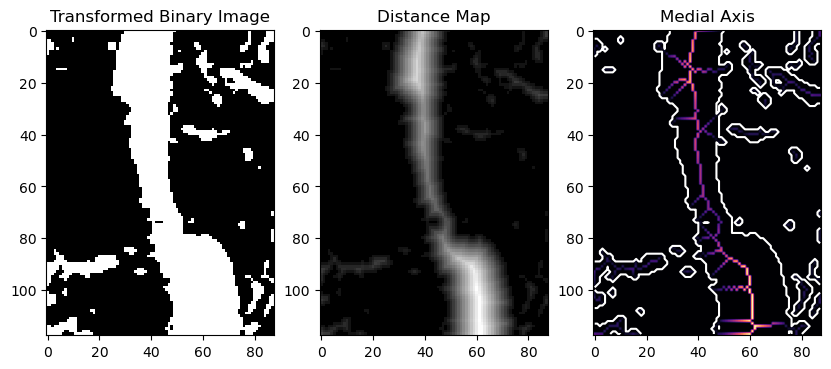

Target artery diameter =  26.30589287593181 mm
Blockage percentage =  72.58750126848699 %


In [32]:
originalImage = cv2.imread(r"XRayImages\stenosis.jpg")
plt.imshow(originalImage)
plt.title("Original Image")
plt.show()
detectBalloonSize(r"XRayImages\stenosis_crop.jpg", 115)

## Case 3

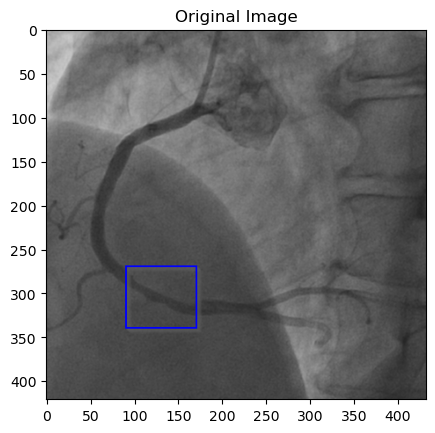

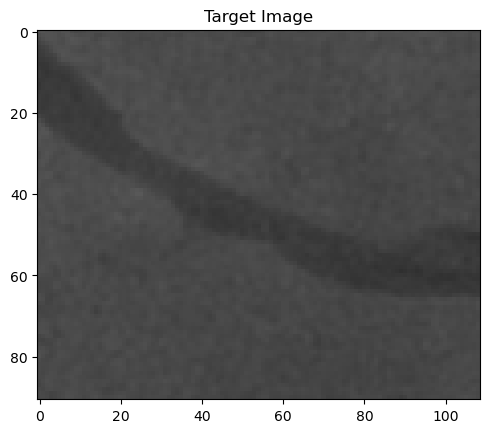

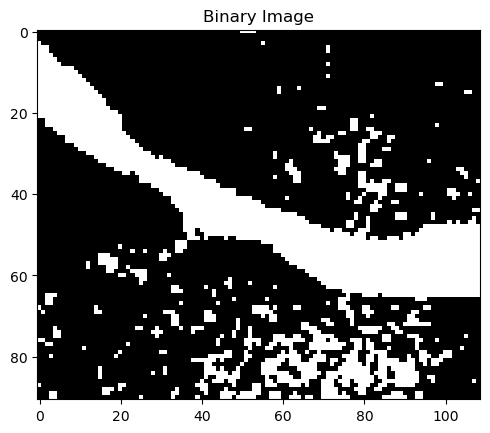

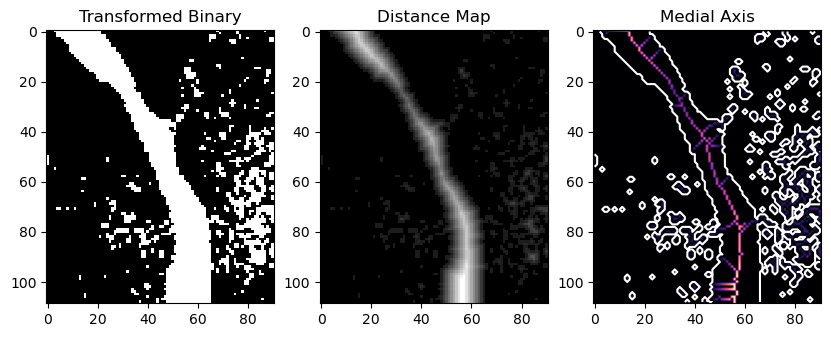

Target artery diameter =  18.110770276274835 mm
Blockage percentage =  65.0784852115211 %


In [34]:
originalImage = cv2.imread(r"XRayImages\stenosis.png")
plt.imshow(originalImage)
plt.title("Original Image")
plt.show()
case3()

## Comparision

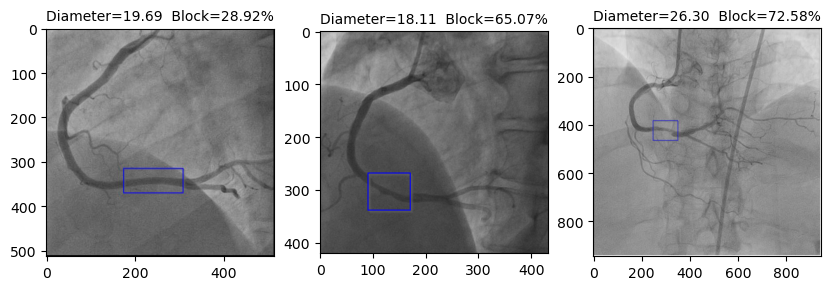

In [36]:
comparision()